# BIHMV Dataset Creation
In this notebook, we create TS for the TSSB from the BIHMV data archive.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
import wfdb
sys.path.append("../")

from scipy import signal
from tqdm import tqdm
from src.visualizer import plot_ts

First, we need to download the PhysioNet record and annotation from https://physionet.org/content/vfdb/1.0.0/.

In [3]:
subject = 418

In [4]:
rec = wfdb.rdrecord(f"{subject}", pn_dir='vfdb') 

In [5]:
ann = wfdb.rdann(f"{subject}", "atr", pn_dir='vfdb')

In [21]:
signal = 1
name = f"BIHMV_{rec.sig_name[signal]}{signal}_Subject{subject}"
ts = rec.p_signal[:,signal]
cps = np.array(ann.sample)[np.array(ann.symbol) == "+"]

# ignore first CPs as it marks the beginning 
cps = cps[1:]

Let's visualise the TS.

<Figure size 432x288 with 0 Axes>

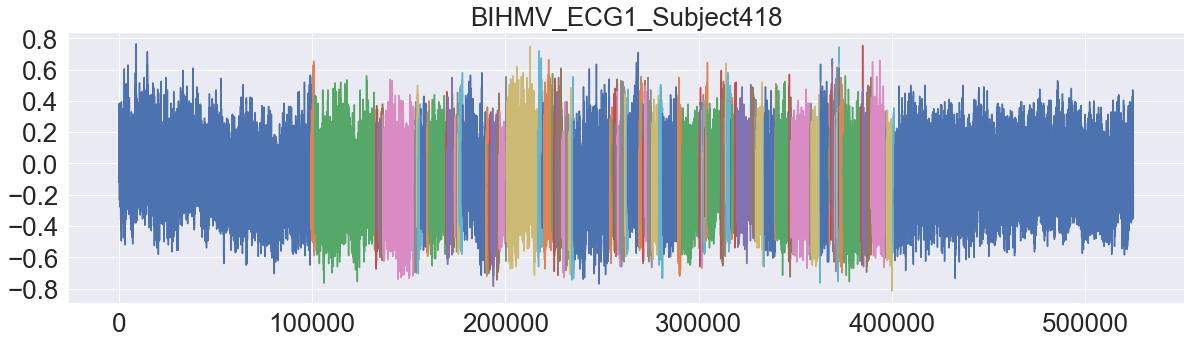

In [22]:
plot_ts(
    name,
    ts,
    cps,
    show=True
)

Finally, let's save the TS and display the annotated CPs.

In [23]:
print(f"{name},250,{','.join(dp.map(str, cps))}")
np.savetxt(f"../datasets/VLTS/{name}.txt", ts)

BIHMV_ECG1_Subject418,250,99624,101499,133092,134038,135775,136628,153057,154115,154942,156291,159442,160516,169192,169807,173054,173673,174788,175403,176259,177868,190080,191249,191807,192695,195631,196794,200211,200634,216788,219038,219961,224019,225355,226057,227211,229269,231310,232724,234499,235538,254230,255365,256019,256884,257249,257980,259557,261903,262749,263519,269307,270999,271326,271596,272057,272384,273673,275846,279576,281384,289384,291211,300480,301076,301525,301711,302230,302538,302871,303346,303641,304634,311442,311807,312096,313480,313826,314173,314493,316807,317237,317480,318682,319769,327480,329038,329365,329749,333826,334211,339769,340019,346634,347038,347403,347730,357634,358403,362711,363115,367749,368134,368583,369211,370153,370557,370971,371653,372041,372692,373076,374961,384096,384942,386903,389365,396833,397249,400769,401423
